Problem 1: Lets find 

$$ \int_1^2  ln(x) dx $$


### <center><u> Python Code<u></center>

i will take $y_0 = 1$


In [1]:
import numpy as np ## Importing Libraries

def f(x): ## Defining integrand
    return np.log(x)

y0 = 1;a = 1;b = 2
N_trail = 10000
N_hit = 0
for i in range(N_trail):
    x = np.random.uniform(low = a,high = b)   ## Generating random numbers between the given limit
    y = np.random.uniform(low = 0,high = y0)

    if(y<f(x)): ## condition for calculating n_hits
        N_hit += 1
Y_est = (y0*(b-a)*N_hit)/N_trail ## integral value
print("Integral Value = ", Y_est)
    




Integral Value =  0.3871


Problem 2 ->Find The Volume inside a plane $x+y+z = 2$ in the first quadrant i.e. $$ \int_{x=0}^2\int_{y=0}^{2-x} (2-x-y)dxdy $$



I will inscribe this plane by a cube of length 2.2(seeing the upper limit) then i will generate 3 random numbers simultaneously i.e. $x_0,  y_0 , z_0$ and will see whether $z0$ lies below the plane or not

    
### <center><u> Python Code<u></center>

In [2]:
import numpy as np ## Importing Libraries

def Z(x,y): ## Defining integrand which is a function of two variables
    return 2-x-y;

cube_side = 2.2
volume = cube_side**3 
N_trail = 40000

N_hit = 0
for i in range(N_trail):
    x = np.random.uniform(low = 0,high = cube_side)
    y = np.random.uniform(low = 0,high = cube_side)
    z = np.random.uniform(low = 0,high = cube_side)
    if(z<Z(x,y)): ## condition for calculating n_hits
        N_hit += 1
Y_est = (volume*N_hit)/N_trail ## integral value
print("Integral Value = ", Y_est)
    




Integral Value =  1.3216830000000004


Clearly we see we don't get the same result every time so we take large number of data and take it's average for example  below i have plotted the histogram of the integral value that is obtained for same N_trail for N_iter times 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


def Z(x,y):
    return 2-x-y

cube_side = 2.2
volume = cube_side**3

N_trail = 2000
N_iter = 2000

S = []

for i in tqdm(range(N_iter)):
    N_hit = 0
    for i in range(N_trail):
        x = np.random.uniform(low = 0,high = cube_side)
        y = np.random.uniform(low = 0,high = cube_side)
        z = np.random.uniform(low = 0,high = cube_side)

        if(z<Z(x,y)):
            N_hit += 1
    I_est = (volume*N_hit)/(N_trail)
    S.append(I_est)
S = np.array(S)

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [01:10<00:00, 28.50it/s]


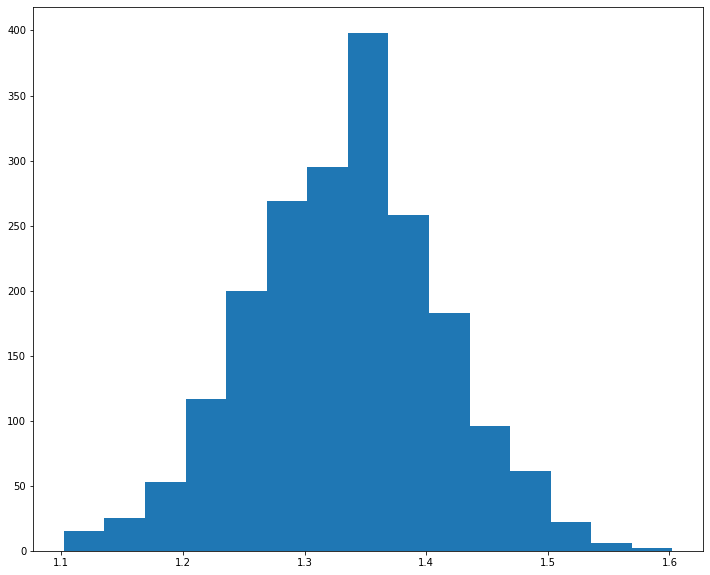

 Integral Mean 1.3339308620000006


In [11]:
plt.figure(figsize = (12,10))
plt.hist(S,bins = 15)
plt.show()
print(" Integral Mean",np.mean(S))

as we can see  this estimate of integral becomes precise as  $N\rightarrow \infty$ and will eventually
converge to the correct answer. This technique is an example of a ‘simple sampling’ Monte Carlo method!

but one important thing again i want to mention

<i> One must not stop a stochastic calculation simply because the result is just right, nor one should continue to play because the result is not close enough to what we think the answer should be !! </i> -- Werner Krauth.


------------------------------------------------------
#### Problem 3.
Now you will get a real taste of Monte Carlo integration techniques . Cuz we are going to find out the volume of *n dimensional unit sphere* and verify the formula $$ V_n(R) = \frac{\pi^{\frac{N}{2}}R^N}{\Gamma(\frac{N}{2} +1)} $$





### Solution 
So heres the procedure

1. consider a 2D case for example in which we can easily inscribe this circle (radius R) within a square of side $2R$ and can calculate the volume(area for 2D) using Monte Carlo integration technique by taking average over large values
2. Do it for N ranging from 1 to 30 (say)
3. plot both graphs($V \  \ vs \ \  N$) analytical as well that obtained from Mote Carlo

### <center> Python Code </center>


before going into solution i will calculate the volume of a sphere and then we will generalize it for N dimensional


Now as we know sphere(Radius R) can be inscribed within the cube of side (2R)  so we  will generate 3 Random numbers simultaneously within $-2R$ to $2R$ i.e. x,y,z coordinate and if $x^2+y^2 +z^2 <1$ then append N_hit by one else not.do it for many N_trail and calculate N_hit and volume will be $$ V_3 =8\frac{N_{hits}}{N_{trail}}$$
because R = 1

In [14]:
import numpy as np
from tqdm import tqdm

N_trail = 5000

N_iter = 700
R = 1
cube_side = 2*R
cube_volume = cube_side**3
Volume_array= []

for i in tqdm(range(N_iter)):
    N_hit = 0
    for i in range(N_trail):
        X = np.random.uniform(low = -1*R,high = 1*R,size = 3) # it generates 3 random numbers i..e. array of 3 
        
        if(np.sum(X*X)<1):  ## np.sum(X*X) This is basically x**2+y**2+z**2
            N_hit += 1
    I_est = (cube_volume*N_hit)/(N_trail)
    Volume_array.append(I_est)
Volume_array = np.array(Volume_array)
V_3 = np.mean(Volume_array)

print("Estimated Volume of a unit sphere ",V_3)

100%|████████████████████████████████████████████████████████████████████████████████| 700/700 [01:31<00:00,  7.63it/s]

Estimated Volume of a unit sphere  4.188923428571429


## Clearly it works so we can do our final calculation now!!

In [26]:
import numpy as np
from tqdm import tqdm

N_trail = 5000
N = np.arange(1,20,1)

N_iter = 150
R = 1
cube_side = 2*R
volume_arr = []

for j in tqdm(range(int(len(N)))): ### Loopping over each N
    n = N[j]     #dimension
    cube_volume = cube_side**n
    Volume= [] ## this will have volume obtained from MC methods .we will take it's mean in the end

    for i in range(N_iter):  ##we calculate volume for a given n N_iter times and take average
        N_hit = 0
        for i in range(N_trail): ## Counting Hits
            X = np.random.uniform(low = -1*R,high = 1*R,size = n) # it generates n random numbers i..e. array of 3 
            if(np.sum(X*X)<1):  ## np.sum(X*X) This is basically x**2+y**2+z**2+ ... +x**n 
                N_hit += 1
        I_est = (cube_volume*N_hit)/(N_trail) ##this is V(N)
        Volume.append(I_est) ##storing volume
        
    Volume = np.array(Volume) 
    
    V_3 = np.mean(Volume) ## Taking average and storing them in array
    volume_arr.append(V_3)
    

    
    

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [06:04<00:00, 19.18s/it]


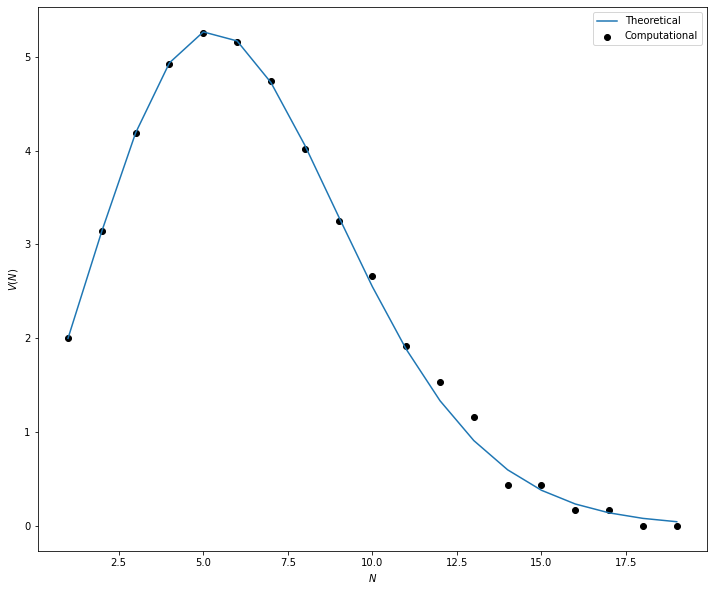

In [27]:
## Plotting data
from scipy.special import gamma, factorial ##importing Libraries for Gamma Function
V_th = np.pi**(N/2)/(gamma(N/2+1))  ## V(N) (analytic curve)
plt.figure(figsize = (12,10))
plt.plot(N,V_th,label = "Theoretical")
plt.scatter(N,volume_arr,color= 'k',label = "Computational")
plt.ylabel(r'$V(N)$')
plt.xlabel(r'$N$')
plt.legend()
plt.show()

# $VOILA!!!$